## The effect of the _"Black Lives Matter"_ movement on the arrestation of African American people in L.A.

____

### Context _(TODO)_

...

In July 2013, after the acquittal of the neighborhood watch coordinator George Zimmerman in the shooting of the African American Trayvin Martin, the hashtag #BlackLivesMatter appeared for the first time on social media. This event launched the creation of the now worldwide known movement "Black Lives Matter" that aims to advocate against violence inflicted on Black communities.

___

### The data _(TODO)_


For our analysis, we will work on [Los Angeles Crime & Arrest Data](https://www.kaggle.com/cityofLA/los-angeles-crime-arrest-data?select=crime-data-from-2010-to-present.csv) which is provided by the City of Los Angeles. This dataset maps all the arrests that have been performed in LA between January 2010 and July 2019.

This dataset contains the following main variables:

- `Report ID`: ID of the arrest
- `Arrest date`: date of the arrest
- `Time`: an integer with the time of the arrest in 24 hour
- `Area ID`: refers to the geographic areas within the department
- `Area Name`: a string with the name of the area
- `Reporting District`: an integer that represents a sub-area within the geographic area
- `Age`: integer for the age of the arrested person
- `Sex code`: a string with F for Female and M for Male
- `Descent Code`: a string for each origin (among them, W stands for white, B for black, H for Hispanic/Latin/Mexican and O for other) 
- `Charge Group Code`: an integer corresponding to a category of arrest charge

Other variables are also present but will not be studied in the analysis:

- `Charge Group Code`
- `Charge Group Description`
- `Arrest Type Code`
- `Charge`
- `Charge Description`
- `Address`
- `Cross Street`
- `Location`
- `Zip Codes`
- `Census Tracts`
- `Precinct Boundaries`
- `LA Specific Plans`
- `Council Districts`
- `Neighborhood Councils (Certified`



___

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import statsmodels.api as sm
import pylab
from scipy import stats
from matplotlib.lines import Line2D


arrest_data = pd.read_csv('arrest-data-from-2010-to-present.csv', error_bad_lines = False)

Now that we've loaded our data, let's have a sneak peek at our dataframe

In [2]:
arrest_data.head()

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,...,Charge Description,Address,Cross Street,Location,Zip Codes,Census Tracts,Precinct Boundaries,LA Specific Plans,Council Districts,Neighborhood Councils (Certified)
0,5666847,2019-06-22T00:00:00.000,1630.0,14,Pacific,1457,44,M,W,24.0,...,VANDALISM,12300 CULVER BL,NaN,"{'latitude': '33.992', 'human_address': '{""add...",24031.0,918.0,1137.0,10.0,10.0,85.0
1,5666688,2019-06-22T00:00:00.000,1010.0,10,West Valley,1061,8,M,O,NaN,...,NaN,19000 VANOWEN ST,NaN,"{'latitude': '34.1687', 'human_address': '{""ad...",19339.0,321.0,1494.0,NaN,4.0,10.0
2,5666570,2019-06-22T00:00:00.000,400.0,15,N Hollywood,1543,31,F,O,22.0,...,DRUNK DRIVING ALCOHOL/DRUGS,MAGNOLIA AV,LAUREL CANYON BL,"{'latitude': '34.1649', 'human_address': '{""ad...",8890.0,205.0,1332.0,17.0,5.0,39.0
3,5666529,2019-06-22T00:00:00.000,302.0,17,Devonshire,1738,23,F,W,22.0,...,DRUNK DRIVING ALCOHOL/DRUGS,HAYVENHURST ST,N REGAN FY,"{'latitude': '34.2692', 'human_address': '{""ad...",19329.0,69.0,388.0,NaN,2.0,78.0
4,5666742,2019-06-22T00:00:00.000,1240.0,14,Pacific,1472,28,M,W,8.0,...,OBSTRUCT/RESIST EXECUTIVE OFFICER,6600 ESPLANADE ST,NaN,"{'latitude': '33.9609', 'human_address': '{""ad...",25075.0,937.0,241.0,10.0,10.0,16.0


For our analysis, it is not important to keep all columns. Only the ones regarding the race, the date of the arrest, the gender and the type of arrest (i.e. infraction or felony) are of interest to us.

In [3]:
#Picking the necessary columns and renaming them
arrest_data = arrest_data[['Arrest Date', 'Sex Code', 'Descent Code', 'Arrest Type Code']] \
                .rename(columns = {'Arrest Date' : 'Date', 'Sex Code': 'Gender', 'Descent Code': 'Race', 
                                   'Arrest Type Code': 'Arrest Type'})


#Date --> DateTime
arrest_data['Date'] = pd.to_datetime(arrest_data['Date'], errors='coerce')

#Verifying that no date is 'NaT' (Not a Time)
assert(arrest_data.Date.isnull().sum() == 0)

#Sanity checks
assert(datetime.datetime(2010,1,1) == min(arrest_data.Date))
assert(datetime.datetime(2019,6,22) == max(arrest_data.Date))

arrest_data.head()

,Date,Gender,Race,Arrest Type
0,2019-06-22,M,W,M
1,2019-06-22,M,O,O
2,2019-06-22,F,O,M
3,2019-06-22,F,W,M
4,2019-06-22,M,W,F


___

## Question 1

_Since the creation of the Black Lives Matter movement, was there a change in the trend of the overall arrests of African American people in L.A.?_

Let's start by looking at the number of arrests per race, just to get an idea of what that looks like

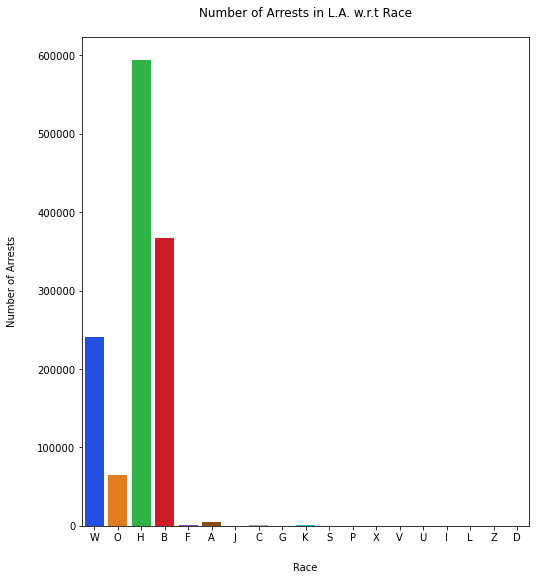

Number of Black people arrested (2010-2019) :  367152
Percentage: 28.77%

Number of Hispanic people arrested (2010-2019) : 594321
Percentage: 46.571%

Number of White people arrested (2010-2019) : 240451
Percentage: 18.842%

Number of Others people arrested (2010-2019) : 65426
Percentage: 5.127%



In [4]:
race_data = arrest_data[['Date', 'Race']]

fig = plt.figure(figsize=(8,9))
ax = plot = sns.countplot(x='Race', data= race_data, palette = 'bright')
plt.title("Number of Arrests in L.A. w.r.t Race", pad = 20)
plt.ylabel('Number of Arrests', labelpad = 20)
plt.xlabel('Race', labelpad = 20)
plt.show()

#Getting count for each race that has a high number of arrests (> 5%)
counts = race_data.Race.value_counts()
black_counts = counts['B']
hispanic_counts = counts['H']
white_counts = counts['W']
others_counts = counts['O']

print('Number of Black people arrested (2010-2019) :  ' + str(black_counts))
print('Percentage: ' + str(round(black_counts/len(arrest_data)*100,3)) + "%\n")
print('Number of Hispanic people arrested (2010-2019) : ' + str(hispanic_counts))
print('Percentage: ' + str(round(hispanic_counts/len(arrest_data)*100,3)) + "%\n")
print('Number of White people arrested (2010-2019) : ' + str(white_counts))
print('Percentage: ' + str(round(white_counts/len(arrest_data)*100,3)) + "%\n")
print('Number of Others people arrested (2010-2019) : ' + str(others_counts))
print('Percentage: ' + str(round(others_counts/len(arrest_data)*100,3)) + "%\n")


We can already see that there is quite a decrepency in the number of arrests w.r.t the race.

The observed difference in the number of arrest per race could be due to a difference in the number of people of different race living in L.A. To assess this, we will scale the data.

In [5]:
# plot only the 3 main race (B, W, H), multiply the number of arrest of each race by the percentage of the race in the population
# 76.3% for W, 13.4% for B, 18.5% for H (https://www.census.gov/quickfacts/fact/table/US/PST045219)

arrest_data_scaled = arrest_data[(arrest_data.Race == 'W') | (arrest_data.Race == 'B')| (arrest_data.Race == 'H')]

Now, let's look at how the creation of the Black Lives Matter movement affected the number of arrest. We will start by counting the number of African American people arrested before and after July, 2013 (from January 2010 to December 2016, i.e. 3.5 years before and after the creation of the black lives matter).

We will begin by looking at "non-model" empirical findings, without using a statistical model. The mean number of arrests of African American before and after the creation of the movement will be compared. 

#### Non-model empirical findings

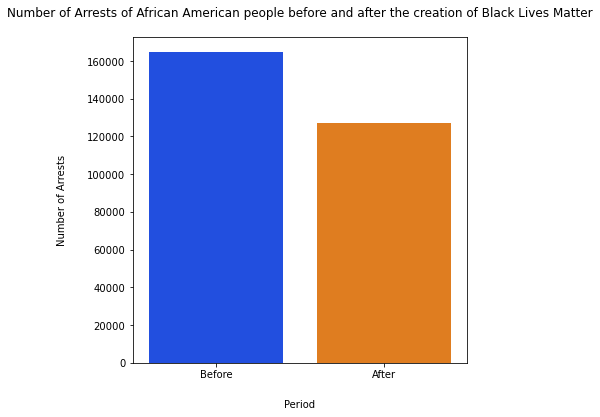

In [6]:
black_data = race_data[race_data['Race'] == 'B']
movement_creation_date = datetime.datetime(2013, 8, 1)
black_before_movement = black_data[black_data['Date'] < movement_creation_date].assign(Period = "Before")
black_after_movement = black_data[(black_data['Date'] >= movement_creation_date) & 
                                  (black_data['Date'] <= datetime.datetime(2016,12,31))].assign(Period = "After")

fig = plt.figure(figsize=(6,6))
ax = plot = sns.countplot(x='Period', data= pd.concat([black_before_movement, black_after_movement]), palette = 'bright')
plt.title("Number of Arrests of African American people before and after the creation of Black Lives Matter", pad = 20)
plt.ylabel('Number of Arrests', labelpad = 20)
plt.xlabel('Period', labelpad = 20)
plt.show()


At first glance, it would seem that the creation of the Black Lives Matter movement had a clear impact on the number of arrests of people of African American descent.  

In [7]:
print('Number of Arrests Before : ' + str(len(black_before_movement)))
print('Number of Arrests After  : ' + str(len(black_after_movement)))
print('Decrease percentage : ' + str(round((len(black_before_movement)- len(black_after_movement))/len(black_before_movement)*100,2)) + "%")

Number of Arrests Before : 164679
Number of Arrests After  : 127028
Decrease percentage : 22.86%


Indeed, we can observe a  reduction of 37'651 arrests that corresponds approximately to a drop of 22.86% in the arrests of African American after July 2013. 

In [8]:
black_trends_before = black_before_movement.set_index('Date') \
                        .replace('B', 1) \
                        .rename(columns = {'Race' : 'Arrestations'}) \
                        .groupby(pd.Grouper(freq = 'M')).sum() \
                        .assign(Period = 'Before')

black_trends_after = black_after_movement.set_index('Date') \
                        .replace('B', 1) \
                        .rename(columns = {'Race' : 'Arrestations'}) \
                        .groupby(pd.Grouper(freq = 'M')).sum() \
                        .assign(Period = 'After')

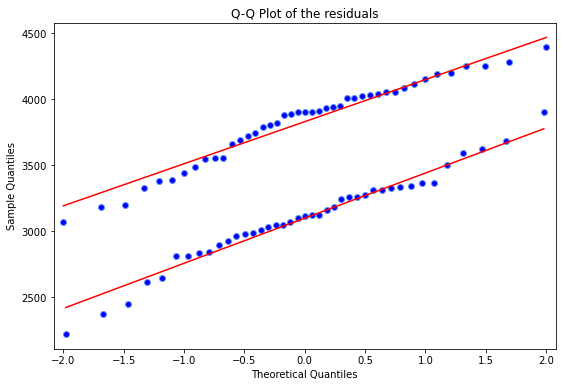

In [9]:
from statsmodels.graphics.gofplots import qqplot
fig, ax = plt.subplots(figsize=(9,6))
qqplot(black_trends_before["Arrestations"], line ='s', ax = ax, color = 'cornflowerblue')
qqplot(black_trends_after["Arrestations"], line ='s', ax = ax, color = 'cornflowerblue')
plt.title("Q-Q Plot of the residuals")
plt.show()

In [10]:
print(black_trends_before.var())
print(black_trends_after.var())

Arrestations    104195.052049
dtype: float64
Arrestations    119986.289024
dtype: float64


In [11]:
display(stats.ttest_ind(black_trends_before['Arrestations'], black_trends_after['Arrestations'], equal_var = False))

Ttest_indResult(statistic=10.001206597811658, pvalue=8.589682236410346e-16)

To better analyse the arrests trends per month, a model-based empirical analysis is required. To do so, a segmented regression analysis is performed. We will perform the segmented regression of the data obtained with July 2013 (date of the creation of the Black Lives Matter movement) as the "interruption" element.

We will start by visualizing this regression analysis.

#### Regression analysis visualization

In [12]:
black_trends = pd.concat([black_trends_before, black_trends_after]).reset_index(drop = True)
black_trends['Time'] = black_trends.index + 1

**Remark :** The first step is to prepare the dataset that will be used for the visualization. The number of arrests of African Americans is aggregated by months and the parameter `Period` is used to label the data (to distinguish between arrests before and after July 2013).

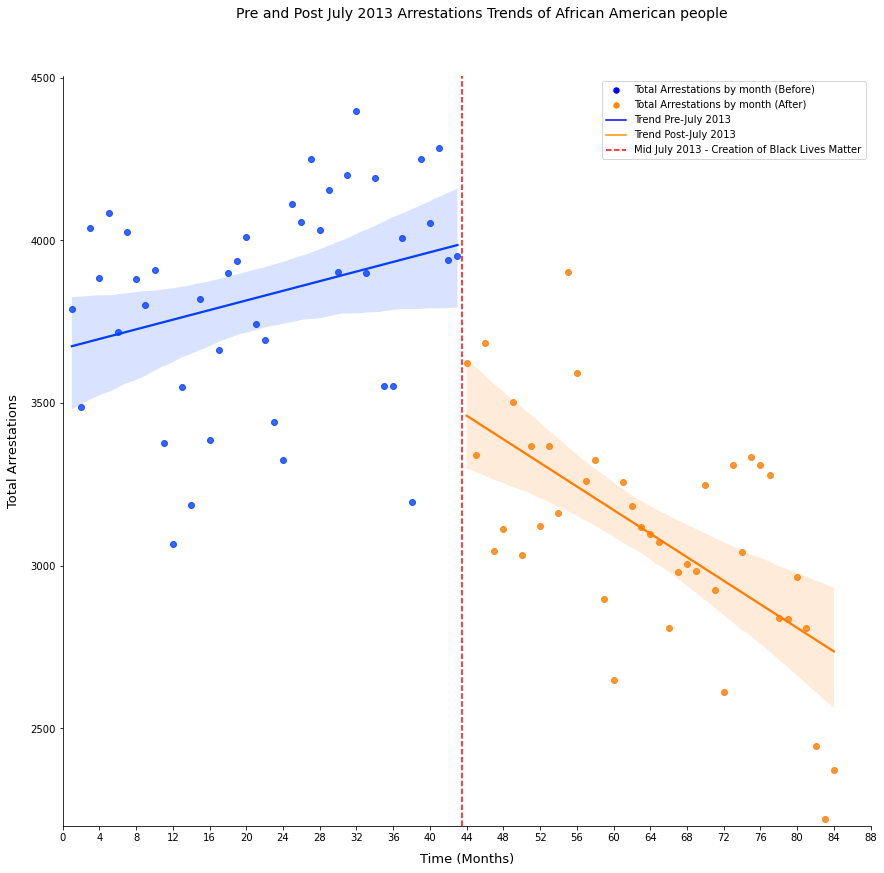

In [13]:
#Showing the results of the segmented linear regression
ax = sns.lmplot(x="Time", y="Arrestations", hue = "Period", data=black_trends, ci=95, palette="bright", height = 12)
ax._legend.remove()
plt.subplots_adjust(top=0.9)
ax.fig.suptitle('Pre and Post July 2013 Arrestations Trends of African American people', fontsize = 14)
ax.set_axis_labels("Time (Months)", "Total Arrestations", fontsize = 13, labelpad = 10)
plt.axvline(x = 43.5, color = 'red', alpha = 2, linestyle = '--')
plt.xlim(0, 86)
plt.ylim(2200, None)
ax.set(xticks = range(0, 92, 4))
#Constructing the legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Total Arrestations by month (Before)', markerfacecolor='blue', markersize=7.5),
                   Line2D([0], [0], marker='o', color='w', label='Total Arrestations by month (After)', markerfacecolor='darkorange', markersize=7.5),
                   Line2D([0], [0], color='blue', label = "Trend Pre-July 2013"), 
                   Line2D([0], [0], color='darkorange', label = "Trend Post-July 2013"), 
                   Line2D([0], [0], color='red', linestyle = '--', alpha = 2 , label = "Mid July 2013 - Creation of Black Lives Matter")]

plt.legend(handles=legend_elements)


plt.show()

This graph includes the trend of the results of the regression analysis and a scatter plot of the data.

In this graph, one can observe a large and immediate drop in the number of arrests right after the creation of the movement. A large difference in the trend of the data can also be observed.

Let's support these findings with numerical results.

#### Numerical Segmented regression

The equation of a segment regression analysis can be seen as follow:

$Y_{t} = \beta_{0} + \beta_{1}\times time + \beta_{2}\times intervention +  \beta_{3}\times postslope + \epsilon_{1}^{111}  $ 

In our case, the varialbe $Y_{t}$ is the monthly aggregate of the arrests of African American people. 

Let's clarify the meaning of the parameters in the above-mentioned equation:

- $\beta_{0}$ represents the baseline level of $Y_t$ at the beginning of the study (meaning, the total number of arrests during the first month)
- $\beta_{1}$ represents the slope of the trend independently from the intervention event (meaning the growh rate of the arrests of African Americans independently from the creation of Black Lives Matter)
- $\beta_{2}$ represents the change in the number of arrests; it measures and represents the effect of the intervention event (i.e. the Black Lives Matter creation)
- $\beta_{3}$ represents the change in the overall trend after the event. It is used to assess whether there is a raise or a decline in the number of arrests of African Americans



Les't begin by constructing the table that will be used:

In [14]:
black_data_regression = black_trends.copy()
black_data_regression['x2'] = black_data_regression['Period'].apply(lambda x : 0 if x == 'Before' else 1)
black_data_regression['x3'] = black_data_regression['Time'].apply(lambda x : x-43 if x>43 else 0)
y_df = black_data_regression['Arrestations']
black_data_regression = black_data_regression.drop(columns = ['Arrestations','Period']).rename(columns = {'Time':'x1'})
black_data_regression

,x1,x2,x3
0,1,0,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,0,0
...,...,...,...
79,80,1,37
80,81,1,38
81,82,1,39
82,83,1,40


**Remark:** The following table contains the three variables that will be used to perform the segmented regression analysis that follows the equation presented above.
In our case, the column `x1` of the dataframe corresponds to the variable $\text{time}$ of the equation, the column `x2` corresponds to the variable $\text{intervention}$ and the column `x3` corresponds to the variable $\text{postslope}$.

Now, let's fit the regression model:

In [15]:
X_df = black_data_regression
X_df = sm.add_constant(X_df.values)
model = sm.OLS(y_df, X_df).fit()
model.summary(xname = ["intercept","time", "intervention", "postslope"])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Arrestations   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     51.87
Date:                Sat, 12 Dec 2020   Prob (F-statistic):           1.01e-18
Time:                        15:38:11   Log-Likelihood:                -594.65
No. Observations:                  84   AIC:                             1197.
Df Residuals:                      80   BIC:                             1207.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept     3666.8372     91.349     40.141      0.000    3485.048    3848.627
time             7.4049      3.617      2.048      0.044       0.208      14.602
intervention  -506.5804    128.642     -3.938      0.000    -762.587    -250.574
postslope      -25.5202      5.307     -4.808      0.000     -36.082     -14.958
==============================================================================
Omnibus:                        2.788   Durbin-Watson:                   1.486
Prob(Omnibus):                  0.248   Jarque-Bera (JB):                2.733
Skew:                          -0.427   Prob(JB):                        0.255
Kurtosis:                       2.772   Cond. No.                         215.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## To add: analyze and conclude on the table

---

## Question 2

How does the evolution of the trend of arrests of the other races differ from those of the African American people ?

In the first part of our analysis, we found a decrease in the overall number of arrests of African Americans after July 2013, date of the creation of the Black Lives Matter movement. To ensure that this reduction is linked with this disruptive event, a control group should be added to the analysis. 

We decided to use as a control group White people living in L.A.. Indeed, the Black Lives Matter movement aims to eradicate white supremacy. Thus, the creation of the movement should not influence the arrestation trend of white people.

#### Non-model empirical findings

As for the analysis of African Americans, we begin with a non-model analysis.

Let's start by preparing the data to analyse the arrestations of white people.

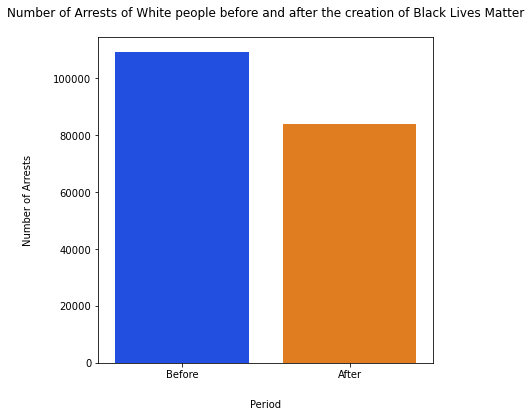

In [16]:
white_data = race_data[race_data['Race'] == 'W']
white_before_movement = white_data[white_data['Date'] < movement_creation_date].assign(Period = "Before")
white_after_movement = white_data[(white_data['Date'] >= movement_creation_date) & 
                                  (white_data['Date'] <= datetime.datetime(2016,12,31))].assign(Period = "After")

fig = plt.figure(figsize=(6,6))
ax = plot = sns.countplot(x='Period', data= pd.concat([white_before_movement, white_after_movement]), palette = 'bright')
plt.title("Number of Arrests of White people before and after the creation of Black Lives Matter", pad = 20)
plt.ylabel('Number of Arrests', labelpad = 20)
plt.xlabel('Period', labelpad = 20)
plt.show()

In [17]:
print('Number of Arrests Before : ' + str(len(white_before_movement)))
print('Number of Arrests After  : ' + str(len(white_after_movement)))
print('Decrease percentage : ' + str(round((len(white_before_movement)- len(white_after_movement))/len(white_before_movement)*100,2)) + "%")

Number of Arrests Before : 109194
Number of Arrests After  : 84031
Decrease percentage : 23.04%


One can observe a similar decrease in the number of arrests.

#### Regression analysis visualization

Let's visualize the regression analysis to have a better insight.

In [18]:
white_trends_before = white_before_movement.set_index('Date') \
                        .replace('W', 1) \
                        .rename(columns = {'Race' : 'Arrestations'}) \
                        .groupby(pd.Grouper(freq = 'M')).sum() \
                        .assign(Period = 'Before')

white_trends_after = white_after_movement.set_index('Date') \
                        .replace('W', 1) \
                        .rename(columns = {'Race' : 'Arrestations'}) \
                        .groupby(pd.Grouper(freq = 'M')).sum() \
                        .assign(Period = 'After')

white_trends = pd.concat([white_trends_before, white_trends_after]).reset_index(drop = True)
white_trends['Time'] = white_trends.index + 1

**Remark :** We start by selecting the data of interest (i.e. the arrestations of white people) and aggregating it on a monthly basis.

To plot the regression, we create a dataset that contains the arrests of both black and white people. A `label_values` function is defined to set labels to the obtained data. It will be used to discriminate between arrests of white and black people, before and after July 2013.

In [19]:
def label_values(x):
    if x <= 42:
        return 'Trend of black arrests before July 2013'
    elif x <= 83:
        return 'Trend of black arrests after July 2013'
    elif x <= 126:
        return 'Trend of white arrests before July 2013'
    else:
        return 'Trend of white arrests after July 2013'

In [20]:
control_trends = black_trends.copy()
control_trends = control_trends.append(white_trends)
control_trends.reset_index(inplace = True)

#Defining the labels
control_trends['Label'] = control_trends.index.values
control_trends['Label'] = control_trends['Label'].apply(label_values)

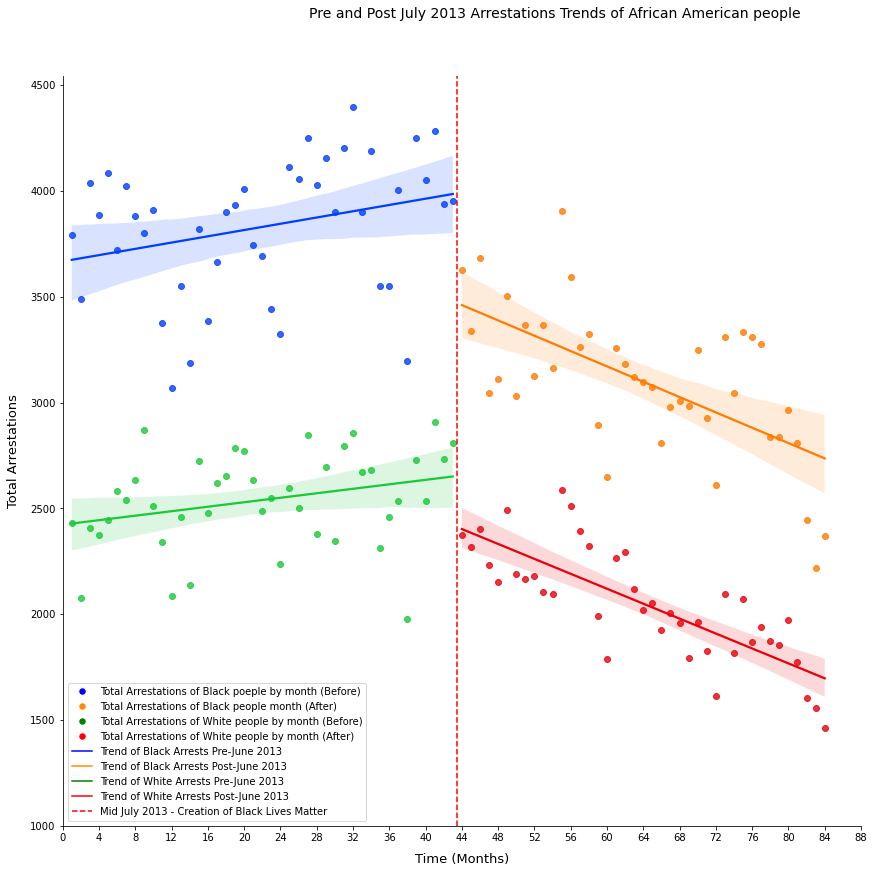

In [21]:
ax = sns.lmplot(x="Time", y="Arrestations", hue = "Label", data=control_trends, ci=95, palette="bright", height = 12)
ax._legend.remove()
plt.subplots_adjust(top=0.9)
ax.fig.suptitle('Pre and Post July 2013 Arrestations Trends of African American people', fontsize = 14)
ax.set_axis_labels("Time (Months)", "Total Arrestations", fontsize = 13, labelpad = 10)
plt.axvline(x = 43.5, color = 'red', alpha = 2, linestyle = '--')
plt.xlim(0, 86)
plt.ylim(1000, None)
ax.set(xticks = range(0, 92, 4))
#Constructing the legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Total Arrestations of Black poeple by month (Before)', markerfacecolor='blue', markersize=7.5),
                   Line2D([0], [0], marker='o', color='w', label='Total Arrestations of Black people month (After)', markerfacecolor='darkorange', markersize=7.5),
                   Line2D([0], [0], marker='o', color='w', label='Total Arrestations of White people by month (Before)', markerfacecolor='green', markersize=7.5),
                   Line2D([0], [0], marker='o', color='w', label='Total Arrestations of White people by month (After)', markerfacecolor='red', markersize=7.5),
                   Line2D([0], [0], color='blue', label = "Trend of Black Arrests Pre-June 2013"), 
                   Line2D([0], [0], color='darkorange', label = "Trend of Black Arrests Post-June 2013"), 
                   Line2D([0], [0], color='green', label = "Trend of White Arrests Pre-June 2013"), 
                   Line2D([0], [0], color='red', label = "Trend of White Arrests Post-June 2013"), 
                   Line2D([0], [0], color='red', linestyle = '--', alpha = 2 , label = "Mid July 2013 - Creation of Black Lives Matter")]

plt.legend(handles=legend_elements)


plt.show()

As before, the graph of the segmented regression analysis includes the trend of the results of the analysis and a scatter plot of the data. This graphs represents the trend of arrests of Black people and the trend of arrests of White people (the control group).

In this graph, one can observe a similar trend for the arrest of white and black people after July 2013. These findings are unconsistents with our hypothesis. Before concluding, let's perform a numerical segmented regression.

#### Numerical Segmented regression

Here, we apply a similar method to the one used to perform the numerical segment regression for black people arrests.

In [22]:
white_data_regression = white_trends.copy()
white_data_regression['x2'] = white_data_regression['Period'].apply(lambda x : 0 if x == 'Before' else 1)
white_data_regression['x3'] = white_data_regression['Time'].apply(lambda x : x-43 if x>43 else 0)
y_df = white_data_regression['Arrestations']
white_data_regression = white_data_regression.drop(columns = ['Arrestations','Period']).rename(columns = {'Time':'x1'})

X_df = white_data_regression
X_df = sm.add_constant(X_df.values)
model = sm.OLS(y_df, X_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Arrestations   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     61.69
Date:                Sat, 12 Dec 2020   Prob (F-statistic):           9.34e-21
Time:                        15:38:14   Log-Likelihood:                -559.89
No. Observations:                  84   AIC:                             1128.
Df Residuals:                      80   BIC:                             1138.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2422.9402     60.394     40.119      0.000    2302.752    2543.129
x1             5.2934      2.391      2.214      0.030       0.535      10.052
x2          -230.6998     85.051     -2.712      0.008    -399.956     -61.443
x3           -22.9277      3.509     -6.534      0.000     -29.911     -15.945
==============================================================================
Omnibus:                        4.862   Durbin-Watson:                   1.718
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                4.090
Skew:                          -0.471   Prob(JB):                        0.129
Kurtosis:                       3.531   Cond. No.                         215.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

These results show also a reduction in the trend of arrests of white people after July 2013.

Whith a closer look on the political history of L.A. we found that in July 2013, Eric Marcetti began his term as L.A. mayer. Mayor Garcetti aimed at making L.A. a safer place. This could explain the overall decrease in arrestations (across all races) after July 2013.

##### Hispanics as a control group

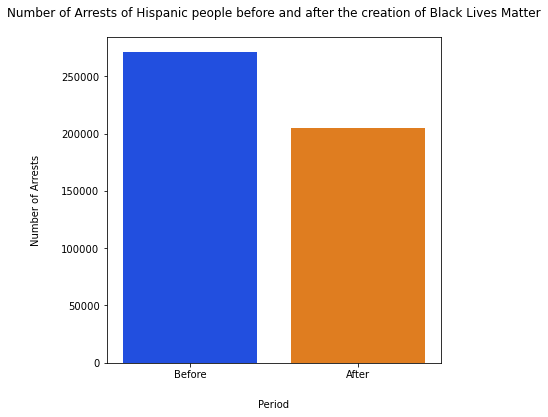

In [23]:
hispanic_data = race_data[race_data['Race'] == 'H']
hispanic_before_movement = hispanic_data[hispanic_data['Date'] < movement_creation_date].assign(Period = "Before")
hispanic_after_movement = hispanic_data[(hispanic_data['Date'] >= movement_creation_date) & 
                                  (hispanic_data['Date'] <= datetime.datetime(2016,12,31))].assign(Period = "After")

fig = plt.figure(figsize=(6,6))
ax = plot = sns.countplot(x='Period', data= pd.concat([hispanic_before_movement, hispanic_after_movement]), palette = 'bright')
plt.title("Number of Arrests of Hispanic people before and after the creation of Black Lives Matter", pad = 20)
plt.ylabel('Number of Arrests', labelpad = 20)
plt.xlabel('Period', labelpad = 20)
plt.show()

In [24]:
hispanic_trends_before = hispanic_before_movement.set_index('Date') \
                        .replace('H', 1) \
                        .rename(columns = {'Race' : 'Arrestations'}) \
                        .groupby(pd.Grouper(freq = 'M')).sum() \
                        .assign(Period = 'Before')

hispanic_trends_after = hispanic_after_movement.set_index('Date') \
                        .replace('H', 1) \
                        .rename(columns = {'Race' : 'Arrestations'}) \
                        .groupby(pd.Grouper(freq = 'M')).sum() \
                        .assign(Period = 'After')

hispanic_trends = pd.concat([hispanic_trends_before, hispanic_trends_after]).reset_index(drop = True)
hispanic_trends['Time'] = hispanic_trends.index + 1

In [25]:
control_h_trends = black_trends.copy()
control_h_trends = control_h_trends.append(hispanic_trends)
control_h_trends.reset_index(inplace = True)

#Defining the labels
control_h_trends['Label'] = control_h_trends.index.values
control_h_trends['Label'] = control_h_trends['Label'].apply(label_values)

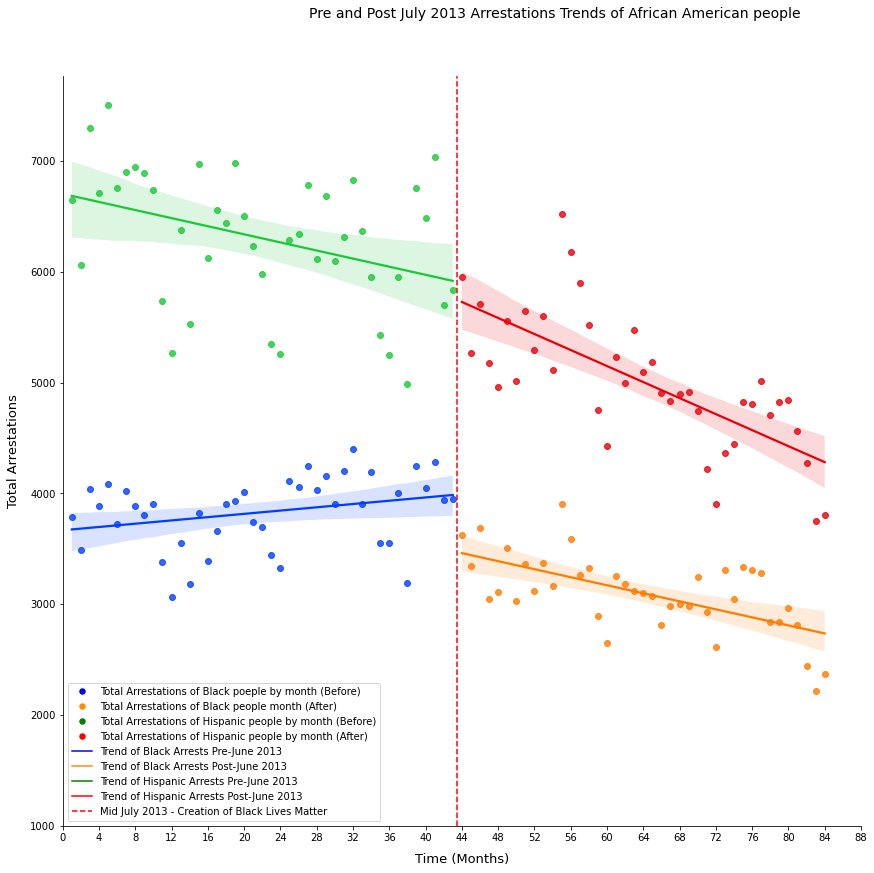

In [26]:
ax = sns.lmplot(x="Time", y="Arrestations", hue = "Label", data=control_h_trends, ci=95, palette="bright", height = 12)
ax._legend.remove()
plt.subplots_adjust(top=0.9)
ax.fig.suptitle('Pre and Post July 2013 Arrestations Trends of African American people', fontsize = 14)
ax.set_axis_labels("Time (Months)", "Total Arrestations", fontsize = 13, labelpad = 10)
plt.axvline(x = 43.5, color = 'red', alpha = 2, linestyle = '--')
plt.xlim(0, 86)
plt.ylim(1000, None)
ax.set(xticks = range(0, 92, 4))
#Constructing the legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Total Arrestations of Black poeple by month (Before)', markerfacecolor='blue', markersize=7.5),
                   Line2D([0], [0], marker='o', color='w', label='Total Arrestations of Black people month (After)', markerfacecolor='darkorange', markersize=7.5),
                   Line2D([0], [0], marker='o', color='w', label='Total Arrestations of Hispanic people by month (Before)', markerfacecolor='green', markersize=7.5),
                   Line2D([0], [0], marker='o', color='w', label='Total Arrestations of Hispanic people by month (After)', markerfacecolor='red', markersize=7.5),
                   Line2D([0], [0], color='blue', label = "Trend of Black Arrests Pre-June 2013"), 
                   Line2D([0], [0], color='darkorange', label = "Trend of Black Arrests Post-June 2013"), 
                   Line2D([0], [0], color='green', label = "Trend of Hispanic Arrests Pre-June 2013"), 
                   Line2D([0], [0], color='red', label = "Trend of Hispanic Arrests Post-June 2013"), 
                   Line2D([0], [0], color='red', linestyle = '--', alpha = 2 , label = "Mid July 2013 - Creation of Black Lives Matter")]

plt.legend(handles=legend_elements)


plt.show()

In [27]:
hispanic_data_regression = hispanic_trends.copy()
hispanic_data_regression['x2'] = hispanic_data_regression['Period'].apply(lambda x : 0 if x == 'Before' else 1)
hispanic_data_regression['x3'] = hispanic_data_regression['Time'].apply(lambda x : x-43 if x>43 else 0)
y_df = hispanic_data_regression['Arrestations']
hispanic_data_regression = hispanic_data_regression.drop(columns = ['Arrestations','Period']).rename(columns = {'Time':'x1'})

X_df = hispanic_data_regression
X_df = sm.add_constant(X_df.values)
model = sm.OLS(y_df, X_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Arrestations   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     58.75
Date:                Sat, 12 Dec 2020   Prob (F-statistic):           3.60e-20
Time:                        15:38:18   Log-Likelihood:                -640.05
No. Observations:                  84   AIC:                             1288.
Df Residuals:                      80   BIC:                             1298.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6702.7143    156.844     42.735      0.000    6390.586    7014.843
x1           -18.2640      6.209     -2.941      0.004     -30.621      -5.907
x2          -154.1892    220.876     -0.698      0.487    -593.747     285.369
x3           -17.8791      9.113     -1.962      0.053     -36.014       0.256
==============================================================================
Omnibus:                        0.554   Durbin-Watson:                   1.409
Prob(Omnibus):                  0.758   Jarque-Bera (JB):                0.514
Skew:                          -0.184   Prob(JB):                        0.773
Kurtosis:                       2.893   Cond. No.                         215.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---

### Question 3

Is there a difference in the number of arrestations between males and females African Americans ? What about after the Black Lives Matter movement ?

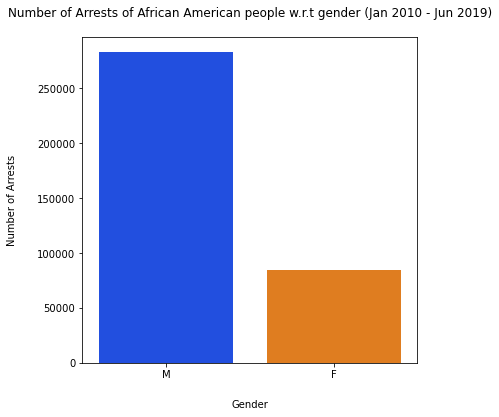

In [28]:
gender_black_data = arrest_data[arrest_data['Race'] == 'B'][['Date', 'Gender']].reset_index(drop = True)

fig = plt.figure(figsize=(6,6))
ax = plot = sns.countplot(x='Gender', data=gender_black_data, palette = 'bright')
plt.title("Number of Arrests of African American people w.r.t gender (Jan 2010 - Jun 2019)", pad = 20)
plt.ylabel('Number of Arrests', labelpad = 20)
plt.xlabel('Gender', labelpad = 20)
plt.show()

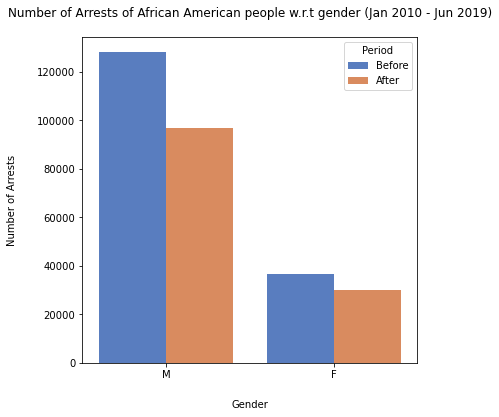

In [29]:
gender_black_data['Period'] = gender_black_data['Date'].apply(lambda x: 'Before' if x <= movement_creation_date else 'After')
gender_black_data = gender_black_data[gender_black_data['Date'] <= datetime.datetime(2016,12,31)].reset_index(drop = True).sort_values(by='Date')

fig = plt.figure(figsize=(6,6))
ax = plot = sns.countplot(x='Gender', hue = 'Period',data=gender_black_data, palette = 'muted')
plt.title("Number of Arrests of African American people w.r.t gender (Jan 2010 - Jun 2019)", pad = 20)
plt.ylabel('Number of Arrests', labelpad = 20)
plt.xlabel('Gender', labelpad = 20)
plt.show()

Segmented regression analysis

In [30]:
female_black_data = gender_black_data[gender_black_data['Gender'] == 'F'] \
                    .set_index('Date') \
                    .replace('F', 1) \
                    .rename(columns = {'Gender' : 'Arrestations'}) \
                    .groupby(pd.Grouper(freq = 'M')).sum() \
                    .reset_index() \
                    .sort_values(by = 'Date')

female_black_data_before = female_black_data[female_black_data['Date'] < datetime.datetime(2013, 8, 1)] \
                            .assign(Period = 'Before Female') \
                            .assign(Time = lambda x : x.index + 1)

female_black_data_after = female_black_data[female_black_data['Date'] >= datetime.datetime(2013, 8, 1)] \
                            .assign(Period = 'After Female') \
                            .assign(Time = lambda x : x.index + 1)


male_black_data = gender_black_data[gender_black_data['Gender'] == 'M'] \
                    .set_index('Date') \
                    .replace('M', 1) \
                    .rename(columns = {'Gender' : 'Arrestations'}) \
                    .groupby(pd.Grouper(freq = 'M')).sum() \
                    .reset_index() \
                    .sort_values(by = 'Date')

male_black_data_before = male_black_data[male_black_data['Date'] < datetime.datetime(2013, 8, 1)] \
                            .assign(Period = 'Before Male') \
                            .assign(Time = lambda x : x.index + 1)

male_black_data_after = male_black_data[male_black_data['Date'] >= datetime.datetime(2013, 8, 1)] \
                            .assign(Period = 'After Male') \
                            .assign(Time = lambda x : x.index + 1)

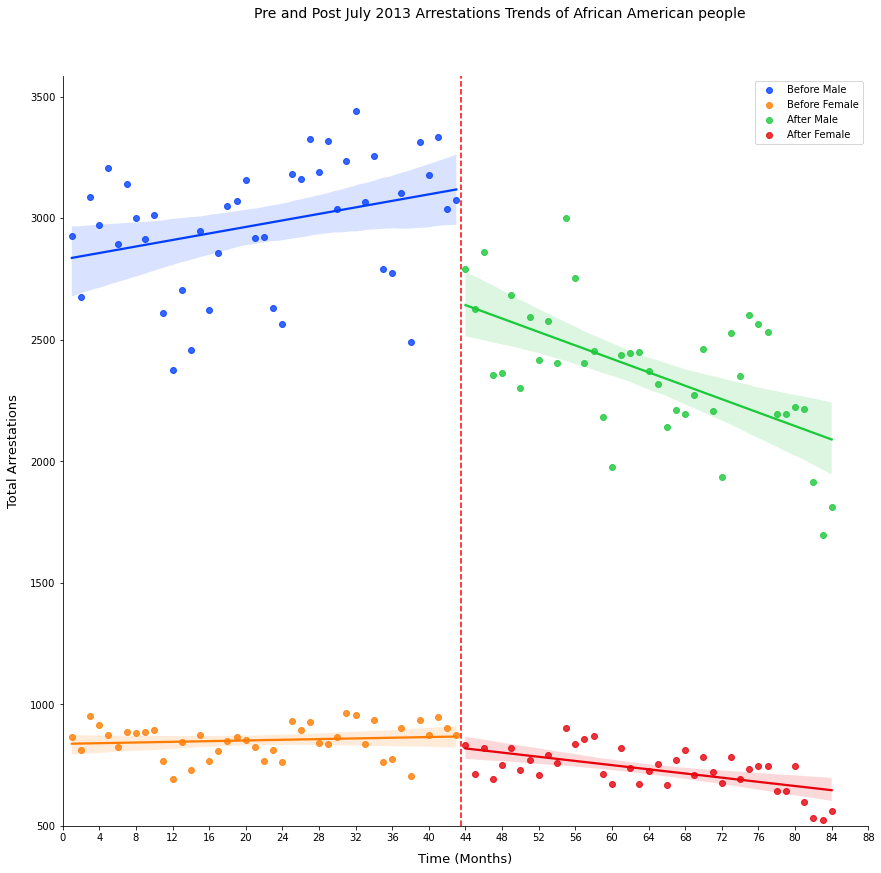

In [31]:
ax = sns.lmplot(x="Time", y="Arrestations", hue = "Period", data=pd.concat([male_black_data_before, female_black_data_before, male_black_data_after, female_black_data_after]),
                ci=95, palette="bright", height = 12)

plt.subplots_adjust(top=0.9)
ax._legend.remove()
ax.fig.suptitle('Pre and Post July 2013 Arrestations Trends of African American people', fontsize = 14)
ax.set_axis_labels("Time (Months)", "Total Arrestations", fontsize = 13, labelpad = 10)
plt.axvline(x = 43.5, color = 'red', alpha = 2, linestyle = '--')
plt.xlim(0, 86)
plt.ylim(500, None)
ax.set(xticks = range(0, 92, 4))

plt.legend()


plt.show()

Male Segmented regression

In [32]:
male_trends = pd.concat([male_black_data_before, male_black_data_after])
male_trends['x2'] = male_trends.Period.apply(lambda x : 0 if x=='Before Male' else 1)
male_trends['x3'] = male_trends.Time.apply(lambda x: x-43 if x>43 else 0)
y_df = male_trends['Arrestations']
male_trends = male_trends.drop(columns = ['Date', 'Period', 'Arrestations']).rename(columns = {'Time':'x1'})

In [33]:
X_df = male_trends
X_df = sm.add_constant(X_df.values)
model = sm.OLS(y_df, X_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Arrestations   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     54.80
Date:                Sat, 12 Dec 2020   Prob (F-statistic):           2.37e-19
Time:                        15:38:27   Log-Likelihood:                -576.49
No. Observations:                  84   AIC:                             1161.
Df Residuals:                      80   BIC:                             1171.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2829.7342     73.587     38.454      0.000    2683.291    2976.178
x1             6.7045      2.913      2.301      0.024       0.907      12.502
x2          -461.9618    103.630     -4.458      0.000    -668.192    -255.731
x3           -20.5252      4.275     -4.801      0.000     -29.034     -12.017
==============================================================================
Omnibus:                        2.144   Durbin-Watson:                   1.415
Prob(Omnibus):                  0.342   Jarque-Bera (JB):                2.138
Skew:                          -0.366   Prob(JB):                        0.343
Kurtosis:                       2.727   Cond. No.                         215.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
female_trends = pd.concat([female_black_data_before, female_black_data_after])
female_trends['x2'] = female_trends.Period.apply(lambda x : 0 if x=='Before Female' else 1)
female_trends['x3'] = female_trends.Time.apply(lambda x: x-43 if x>43 else 0)
y_df = female_trends['Arrestations']
female_trends = female_trends.drop(columns = ['Date', 'Period', 'Arrestations']).rename(columns = {'Time':'x1'})

In [35]:
X_df = female_trends
X_df = sm.add_constant(X_df.values)
model = sm.OLS(y_df, X_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Arrestations   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     28.21
Date:                Sat, 12 Dec 2020   Prob (F-statistic):           1.51e-12
Time:                        15:38:27   Log-Likelihood:                -473.72
No. Observations:                  84   AIC:                             955.4
Df Residuals:                      80   BIC:                             965.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        837.1030     21.651     38.663      0.000     794.016     880.190
x1             0.7004      0.857      0.817      0.416      -1.005       2.406
x2           -44.6187     30.491     -1.463      0.147    -105.297      16.060
x3            -4.9950      1.258     -3.971      0.000      -7.498      -2.492
==============================================================================
Omnibus:                        3.777   Durbin-Watson:                   1.622
Prob(Omnibus):                  0.151   Jarque-Bera (JB):                2.715
Skew:                          -0.284   Prob(JB):                        0.257
Kurtosis:                       2.326   Cond. No.                         215.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""